![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Finding Corners**

####**In this lesson we'll learn:**
1. To use Harris Corners to find corners
2. Use Good Features to Track


In [1]:
# Making root folder as working directory
import os
from pathlib import Path
os.chdir("D:\\Learning\\udemy_computer_vision_course")

# checking current workig dirtectory path
print(os.getcwd())

ROOT = Path(".")

D:\Learning\udemy_computer_vision_course


In [4]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# # Download and unzip our images
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
# !unzip -qq images.zip

## **What is a Corner?**

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination.

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/edge.png)

### **Harris Corner Detection** is an algorithm developed in 1988 for corner detection that works fairly well.


**Paper** - http://www.bmva.org/bmvc/1988/avc-88-023.pdf

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)




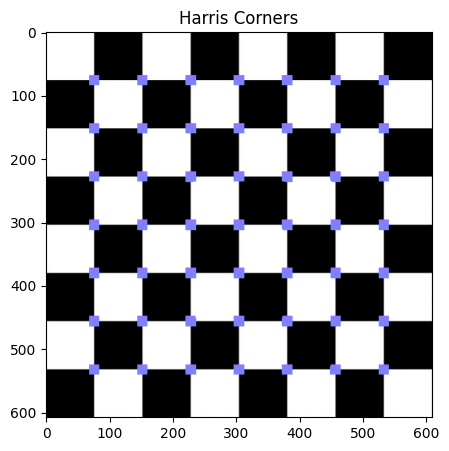

In [5]:
# Load image then grayscale
image = cv2.imread('data/images/chess.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

imshow('Harris Corners', image)

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.


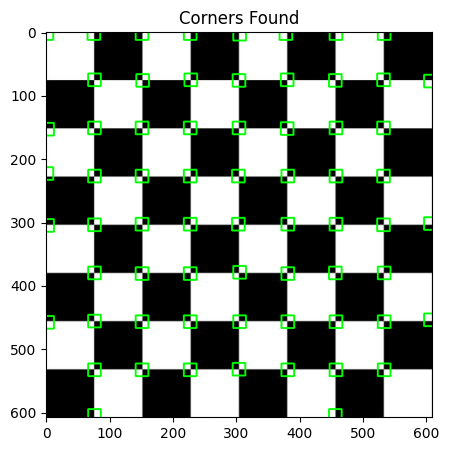

In [6]:
img = cv2.imread('data/images/chess.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    
imshow("Corners Found", img)